# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory code below

In [2]:
# Write your answer here:
print(2492420)

2492420


<font size = "5">

Import the "pandas", "matplotlib.pyplot", "numPy" and "statsmodels.formula.api" libraries

In [3]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf 

<font size = "5">

(a) Functions

<font size = "3">

- Read the dataset labelled features.csv.
- Create a ``` lambda ``` function that checks if horsepower $>$ 100
- Create a new list that shows true if horsepower $>$ 100 and false <br>
if horsepower $\leq$ 100.
- Count how many cars have horsewpower $> 100$.

To get full credit use either the apply or the map function <br>
(see Lectures 7 and 8)

In [9]:
# Write your answer here
carfeatures = pd.read_csv("Data/features.csv")

fn_horsepower = lambda horsepower: horsepower > 100

carfeatures["horsepower"] = pd.to_numeric(carfeatures["horsepower"], errors="coerce")
car_features_horsepower = carfeatures["horsepower"].apply(fn_horsepower)

count_horsepower = 0

for value in car_features_horsepower:
    if value is True:
        count_horsepower = count_horsepower + 1

print(count_horsepower, "cars have hosepower above 100")

150 cars have hosepower above 100


<font size = "5">

(b) Subsetting Data

<font size = "3" >

- Read the dataset labelled features.csv.
- Define a global variable called ```threshold``` that takes the <br>
value 3000
- Subset the data to get one dataset with weight $>$ threshold and <br>
another with weight $\le$ 3000. Use the ```.query()``` function.
- Compute the mean acceleration for each of these datasets.<br>

Note: Review how to define a gloabl variable inside ```.query()```
 

In [10]:
# Write your answer here:
carfeatures = pd.read_csv("Data/features.csv")
threshold = 3000

subset_abovethreshold = carfeatures.query("weight > @threshold")
subset_under3000 = carfeatures.query("weight <= 3000")

mean_abovethreshold = subset_abovethreshold["acceleration"].mean()
print("Mean acceleration with cars that weight over 3000 pounds:", mean_abovethreshold)

mean_under3000 = subset_under3000["acceleration"].mean()
print("Mean acceleration with cars that weight equal to or under 3000 pounds:", mean_under3000)

Mean acceleration with cars that weight over 3000 pounds: 14.7
Mean acceleration with cars that weight equal to or under 3000 pounds: 16.202173913043477


<font size = "5">

(c) Regression

<font size = "3">

In this exercise you are asked to plot acceleration vs. weight and to plot <br>
 the best fit line.

- Run a linear regression between acceleration and weight.
- Extract the intercept and coefficient.
- Using your predicted coefficients, compute the predicted value of acceleration
- Plot a scatter plot with acceleration on the y axis and weight on the x axis.
- On that same figure, plot a line with the predicted values of acceleration

Do not forget to label your axes and title.

Intercept    19.606158
weight       -0.001359
dtype: float64


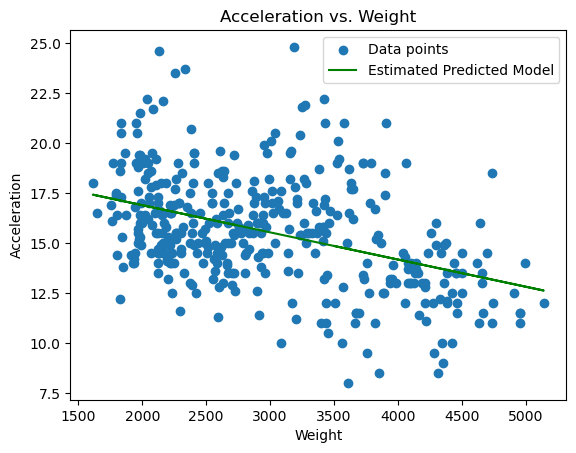

In [14]:
# Write your answer here:

model = smf.ols(formula = 'acceleration ~  weight', data = carfeatures)
results = model.fit()

b_list = results.params
print(b_list)

# Computing "estimated" best fit lines by extracting the intercept and slop from "b_list"

carfeatures["p_estimated"] = b_list[0] + b_list[1]  * carfeatures["weight"]

#SCATTERPLOT

plt.scatter(x = carfeatures["weight"],y = carfeatures["acceleration"])
plt.plot(carfeatures["weight"],carfeatures["p_estimated"], color = 'green')
plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.title('Acceleration vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.show()


<font size = "5">

(d) Use sorting + ".iloc[]"

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players

In [15]:
# Write your own code
fifa_dataset = pd.read_csv("Data/fifa23_players_basic.csv")
sorted_fifa_dataset = fifa_dataset.sort_values(by='Age', ascending=True)
subset_youngest_players = sorted_fifa_dataset.iloc[:5]

print(subset_youngest_players)

            Known As        Full Name  Overall  Potential  Value(in Euro)  \
17956     A. Dithmer  Andreas Dithmer       53         76          275000   
18014      J. Ardila      José Ardila       53         73          250000   
16084       S. Ngoma      Serge Ngoma       58         82          650000   
11481      O. Vargas      Obed Vargas       64         81         1500000   
17591  A. Madaliński  Alan Madaliński       54         68          210000   

      Positions Played Best Position    Nationality  \
17956               GK            GK        Denmark   
18014               CM           CAM      Venezuela   
16084               RW            RM  United States   
11481        CM,CDM,RM           CAM  United States   
17591               GK            GK         Poland   

                                             Image Link  Age  ...  \
17956  https://cdn.sofifa.net/players/269/573/23_60.png   16  ...   
18014  https://cdn.sofifa.net/players/268/892/23_60.png   16  ...   

<font size = "5">

(e) Use queries + global variables

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Compute the mean of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Value(in Euro)`    ``` inside .query()

In [17]:
# Write your own code
fifa_dataset = pd.read_csv("Data/fifa23_players_basic.csv")
mean_value = fifa_dataset["Value(in Euro)"].mean()

subset_abovemean = fifa_dataset.query("`Value(in Euro)` > @mean_value")

#print(len(fifa_dataset))
#print(len(subset_abovemean))

<font size = "5">